In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [593]:
data_df = pd.read_csv("./data/lab2_1_data.csv", header=None)


In [594]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.74589,0.43352,0.34667,0.43563,0.87224,0.91057,0.53584,0.34912,0.54057,0.46997,...,-0.10911,-0.28669,-0.78850,-0.92342,-0.72261,-0.68034,-0.95553,-0.21214,-0.503930,-0.92196
1,-0.43265,-0.53858,-0.35825,-0.95307,-0.59757,-0.73190,-0.75979,-0.31302,-0.56459,-0.97972,...,0.65793,0.87399,0.78979,0.59957,0.85781,0.52850,1.09170,0.48182,0.026142,0.52301


In [595]:
data = data_df.transpose().to_numpy()

In [596]:
RANDOM_STATE = 42
rand_gen = np.random.default_rng(RANDOM_STATE)

max_epochs = 1000
epoch = 0
norm_distance = np.inf
threshold = 1e-8
eta = 1e-4
w = rand_gen.uniform(-1, 1, 2) # input is 2-dimension
w_history = [w]
norm_history = []


In [597]:
w

array([ 0.5479121 , -0.12224312])

In [598]:
while (epoch < max_epochs) and (norm_distance > threshold):
    np.random.shuffle(data) # shuffle data at each epoch
    w_old = w.copy() # copy the old wiehts to compare with the new using the norm2

    for u in data:
        v = np.inner(w, u) # compute output v
        delta_w = (eta * v * u) # compute the delta W
        w = w + delta_w # update the weights
        w_history.append(w)
        norm_history.append(np.linalg.norm(w))
    
    norm_distance = np.linalg.norm(w_old - w)
    epoch += 1
    

In [599]:
epoch

1000

In [600]:
norm_distance

0.9410448060980003

In [601]:
w

array([ 115.38190967, -113.52514346])

In [602]:
Q = np.corrcoef(np.transpose(data))

In [603]:
eigval, eigvec = np.linalg.eig(Q)

In [604]:
eigval

array([1.79945262, 0.20054738])

In [605]:
i_max_eigval = np.argmax(eigval)
i_max_eigval

0

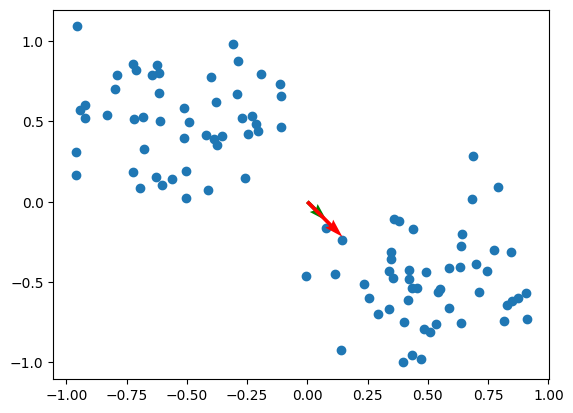

In [606]:
plt.scatter(data[:, 0], data[:, 1])
origin = np.array([0,0])
plt.quiver(*origin, w[0], w[1], color='g')
plt.quiver(*origin, eigvec[:, i_max_eigval][0], eigvec[:, i_max_eigval][1],  color='r', scale=10)
plt.show()

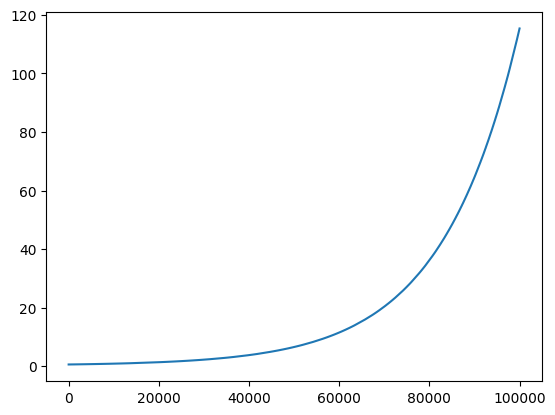

In [609]:
plt.plot(range(0, (100*epoch+1)), [w[0] for w in w_history])
plt.show()

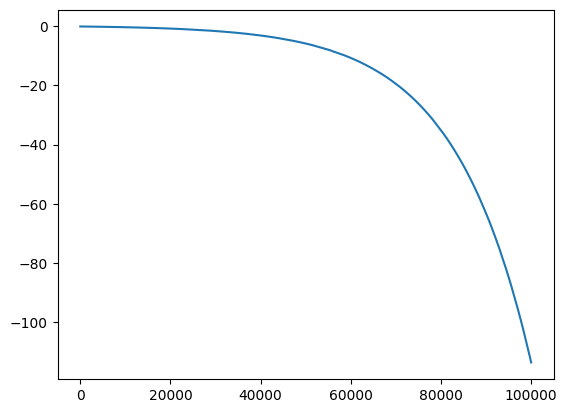

In [610]:
plt.plot(range(0, 100*epoch+1), [w[1] for w in w_history])
plt.show()

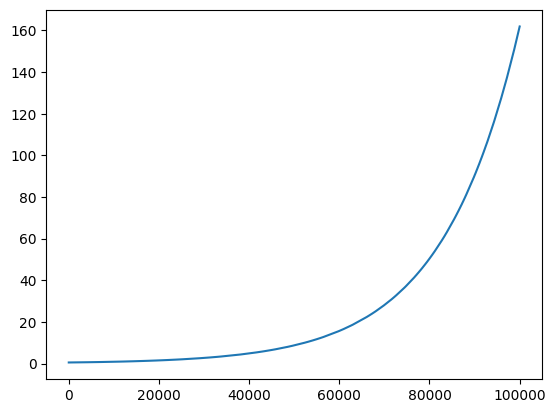

In [612]:
plt.plot(range(0, epoch*100), norm_history)
plt.show()